In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
filename = "020/profiles.csv"
profiles = pd.read_csv(filename, sep='\t', index_col=0)
profiles.head()

,sex,job,blood_group,name,race,address,birthdate,current_location,ssn
0,M,Secretary/administrator,O+,Colton Garcia,Hawaiian,"222 Smith Shoals\r\nOrtegaland, NM 25312",1990-04-02,"(Decimal('81.068645'), Decimal('-61.887841'))",224-40-1972
1,M,Hydrogeologist,AB+,James Gray,Hawaiian,"755 Graham Lake\r\nValdezfurt, IN 21739","03/25/1926, 00:00:00","(Decimal('-5.4110755'), Decimal('-172.109419'))",351-11-1730
2,M,Tourism officer,AB-,Franklin Moore,White,"42832 Patrick Island\r\nEast Bradton, DE 36334","05/06/1958, 00:00:00","(Decimal('-88.540956'), Decimal('-94.396339'))",824-41-6795
3,F,Social worker,A+,Jennifer Anderson,White,Unit 8158 Box 0225\r\nDPO AP 69059,1908-06-07,"(Decimal('85.9643255'), Decimal('-165.105180'))",077-59-6064
4,F,Naval architect,A+,Carrie Wilson,Black,"0994 Daniel Park Apt. 137\r\nWest Melinda, KS ...",13 Jan 1974,"(Decimal('-27.169289'), Decimal('96.479444'))",004-15-9553


In [3]:
filename2 = "020/labor.csv"
labor = pd.read_csv(filename2, sep='\t', index_col=0)
labor.head()

,er-cv,name,indicator,leukocyty,weight,ssn,relationship,etytr,smoker,erytrocyty,trombocyty,hemoglobin,ast,alp,alt,hematokrit,hbver
0,43.09887,Devin Diaz,1.0,4.47526,65.57593,597-97-9078,single,5.96219,no,6.20665,5.71427,5.06667,57.92930,57.60257,5.12934,7.11081,6.32708
1,32.51734,Theodore Morris,1.0,4.41339,58.47779,100-19-5038,divoced,5.44840,no,5.58217,6.29619,6.90945,61.47846,83.38342,10.59365,8.52324,9.06429
2,54.39106,Ashley Mccormick,1.0,4.71119,37.58396,241-30-2551,widowed,6.75478,Y,6.36030,6.67129,4.08668,59.37033,31.60935,10.72644,8.41874,7.11435
3,45.79943,Brent Howard,1.0,5.38079,88.06628,667-52-4116,married,6.33099,no,5.45784,6.24957,5.57164,50.31551,75.29715,9.26557,4.69702,7.00724
4,48.81261,Paul Jordan,0.0,4.72469,44.59816,368-59-5827,divoced,6.62153,no,6.36262,6.44608,6.49617,50.44424,84.90135,9.31196,6.31221,8.54503


In [4]:
def my_fill_na(arg1,ind):
    labor.loc[labor['indicator'] == ind , arg1] = labor.loc[labor['indicator'] == ind , arg1].fillna(
    (labor.loc[labor['indicator'] == ind , arg1].mean()))

In [5]:
my_fill_na('er-cv',0)
my_fill_na('er-cv',1)
my_fill_na('leukocyty',0)
my_fill_na('leukocyty',1)
my_fill_na('etytr',0)
my_fill_na('etytr',1)
my_fill_na('erytrocyty',0)
my_fill_na('erytrocyty',1)
my_fill_na('trombocyty',0)
my_fill_na('trombocyty',1)
my_fill_na('hemoglobin',0)
my_fill_na('hemoglobin',1)
my_fill_na('ast',0)
my_fill_na('ast',1)
my_fill_na('alt',0)
my_fill_na('alt',1)
my_fill_na('alp',0)
my_fill_na('alp',1)
my_fill_na('hematokrit',0)
my_fill_na('hematokrit',1)
my_fill_na('hbver',0)
my_fill_na('hbver',1)

In [6]:
labor.isna().any(axis=1).sum()

0

In [7]:
profiles.isna().any(axis=1).sum()

0

In [8]:
labor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9987 entries, 0 to 9986
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   er-cv         9987 non-null   float64
 1   name          9987 non-null   object 
 2   indicator     9987 non-null   float64
 3   leukocyty     9987 non-null   float64
 4   weight        9987 non-null   float64
 5   ssn           9987 non-null   object 
 6   relationship  9987 non-null   object 
 7   etytr         9987 non-null   float64
 8   smoker        9987 non-null   object 
 9   erytrocyty    9987 non-null   float64
 10  trombocyty    9987 non-null   float64
 11  hemoglobin    9987 non-null   float64
 12  ast           9987 non-null   float64
 13  alp           9987 non-null   float64
 14  alt           9987 non-null   float64
 15  hematokrit    9987 non-null   float64
 16  hbver         9987 non-null   float64
dtypes: float64(13), object(4)
memory usage: 1.4+ MB


In [25]:
def detect_outliner(atr):
    lower = atr.quantile(0.25) - 1.5
    upper = atr.quantile(0.75) + 1.5
    
    return atr[(atr > upper) | (atr < lower)]

In [31]:
labor.leukocyty.drop(detect_outliner(labor.leukocyty).index)

0       4.47526
1       4.41339
2       4.71119
3       5.38079
4       4.72469
         ...   
9982    5.26323
9983    8.38651
9984    4.81549
9985    5.28603
9986    7.07732
Name: leukocyty, Length: 9541, dtype: float64

<AxesSubplot:>

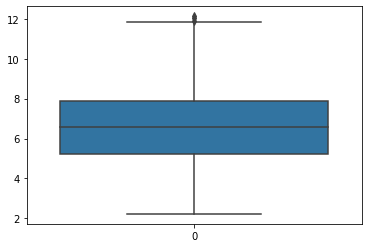

In [33]:
sns.boxplot(data=labor.leukocyty)

<AxesSubplot:>

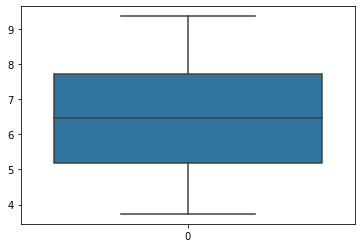

In [34]:
sns.boxplot(data=labor.leukocyty.drop(detect_outliner(labor.leukocyty).index))

In [22]:
labor.leukocyty.quantile()

6.59988

In [39]:
def drop_outliners(atr):
    atr.drop(detect_outliner(atr).index, inplace=True)

<AxesSubplot:>

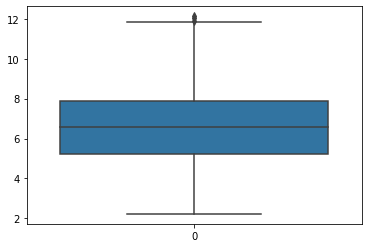

In [45]:
sns.boxplot(data=labor.leukocyty)

In [48]:
labor.drop(detect_outliner(labor.leukocyty).index, inplace=True)

<AxesSubplot:>

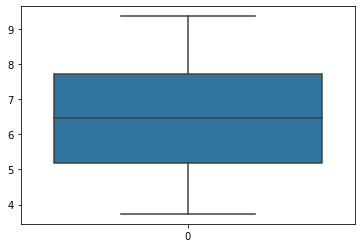

In [49]:
sns.boxplot(data=labor.leukocyty)

<AxesSubplot:>

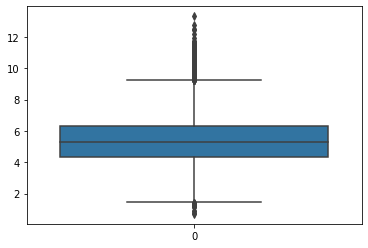

In [50]:
sns.boxplot(data=labor.hemoglobin)

In [53]:
labor.drop(detect_outliner(labor.hemoglobin).index, inplace=True)

<AxesSubplot:>

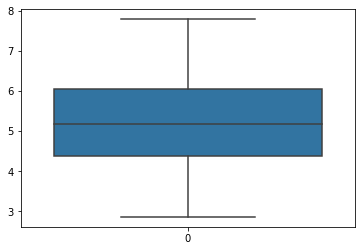

In [54]:
sns.boxplot(data=labor.hemoglobin)

<AxesSubplot:>

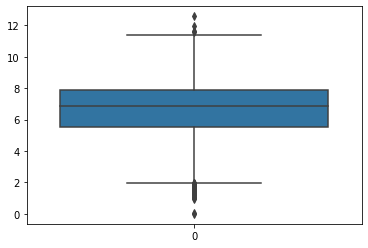

In [55]:
sns.boxplot(data=labor.hematokrit)

In [56]:
labor.drop(detect_outliner(labor.hematokrit).index, inplace=True)

<AxesSubplot:>

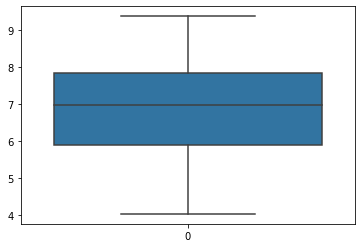

In [57]:
sns.boxplot(data=labor.hematokrit)